## From: https://stackoverflow.com/questions/35373714/reverse-legend-order-pandas-plot

In [1]:
import pandas as pd
import numpy as np
import math

['a', 'b', 'c']

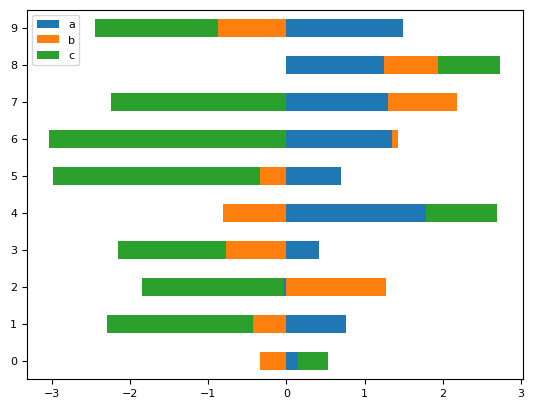

In [25]:
df = pd.DataFrame({'a': np.random.randn(10) + 1, 'b': np.random.randn(10),
                   'c': np.random.randn(10) - 1}, columns=['a', 'b', 'c'])
ax = df.plot(kind='barh', stacked=True)
handles, labels = ax.get_legend_handles_labels()
labels

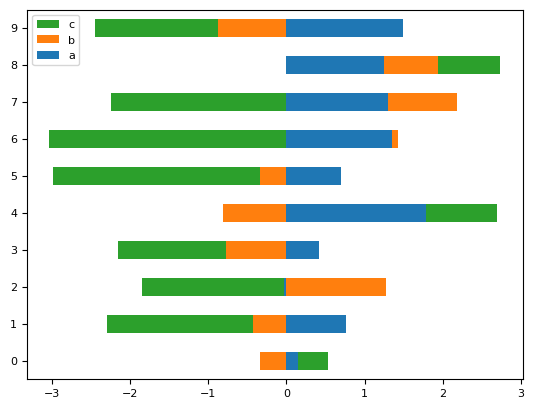

In [26]:
ax = df.plot(kind='barh', stacked=True)
handles, labels = ax.get_legend_handles_labels()
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='upper left')  # reverse both handles and labels

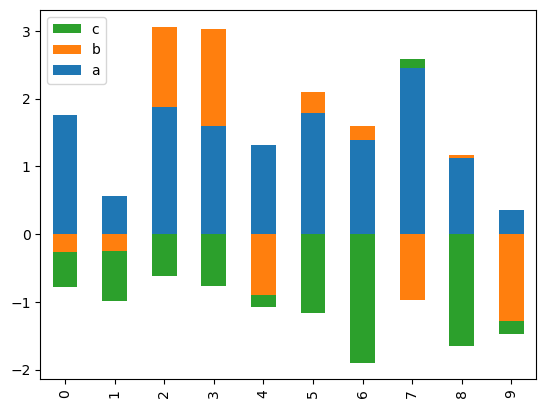

In [2]:
df = pd.DataFrame({'a': np.random.randn(10) + 1, 'b': np.random.randn(10),
                   'c': np.random.randn(10) - 1}, columns=['a', 'b', 'c'])
ax = df.plot(kind='bar', stacked=True)
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='upper left')  # reverse both handles and labels

In [3]:
np.random.seed(2019)

# Hard-code the custom ordering of categories
categories = ['unsure', '<25%', '25 - 50%', '50 - 75%', '75 - 100%']

# Generate some example data
# I'm not sure if this matches your input exactly
df_orig = pd.DataFrame({'District': np.random.choice(list('ABCDE'), size=100), 
                        'Portion of income': np.random.choice(categories + [np.nan], size=100)})

In [4]:
df_orig.head()

,District,Portion of income
0,A,25 - 50%
1,C,75 - 100%
2,A,75 - 100%
3,A,<25%
4,E,<25%


In [5]:
# Unchanged from your code. Note that value_counts() returns a 
# Series, but you name it df
df = df_orig.groupby('District')['Portion of income'].value_counts(dropna=False)
df = df.groupby('District').transform(lambda x: 100*x/sum(x))
print (len(df.index))
df.head()

29


District  Portion of income
A         unsure               27.586207
          <25%                 20.689655
          25 - 50%             17.241379
          75 - 100%            17.241379
          50 - 75%             10.344828
Name: Portion of income, dtype: float64

In [6]:
# In my example data, np.nan was cast to the string 'nan', so 
# I have to drop it like this
df = df.drop(labels='nan', level=1)

In [7]:
# Instead of plotting right away, unstack the MultiIndex
# into columns, then convert those columns to a CategoricalIndex 
# with custom sort order
df = df.unstack()
df

Portion of income,unsure,<25%,25 - 50%,75 - 100%,50 - 75%
District,,,,,
A,27.586207,20.689655,17.241379,17.241379,10.344828
B,23.529412,23.529412,11.764706,11.764706,17.647059
C,19.047619,9.523810,4.761905,28.571429,14.285714
D,21.428571,NaN,21.428571,7.142857,21.428571
E,26.315789,10.526316,10.526316,15.789474,15.789474


In [8]:
df.columns = pd.CategoricalIndex(df.columns.values, 
                                 ordered=True, 
                                 categories=categories)

In [9]:
df.head()

,unsure,<25%,25 - 50%,75 - 100%,50 - 75%
District,,,,,
A,27.586207,20.689655,17.241379,17.241379,10.344828
B,23.529412,23.529412,11.764706,11.764706,17.647059
C,19.047619,9.523810,4.761905,28.571429,14.285714
D,21.428571,NaN,21.428571,7.142857,21.428571
E,26.315789,10.526316,10.526316,15.789474,15.789474


In [10]:
# Sort the columns (axis=1) by the new categorical ordering
df = df.sort_index(axis=1)

# Income Level sort for stacked Bar -- see 75 is first?
  * https://stackoverflow.com/questions/54874269/ordering-of-elements-in-pandas-stacked-bar-chart

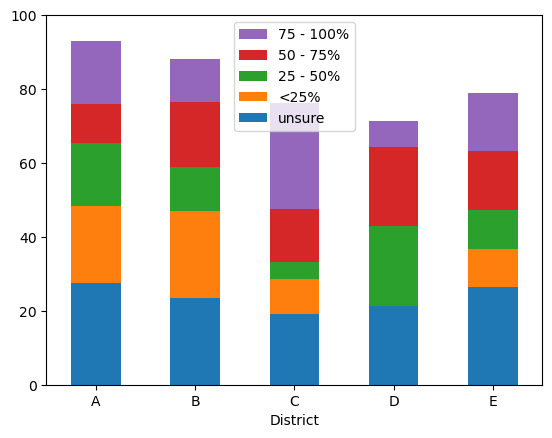

In [11]:
# Plot
ax = df.plot.bar(stacked=True, rot=0)
ax.set_ylim(ymax=100)

# Matplotlib idiom to reverse legend entries 
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels))

In [12]:
import matplotlib.pyplot as plt

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

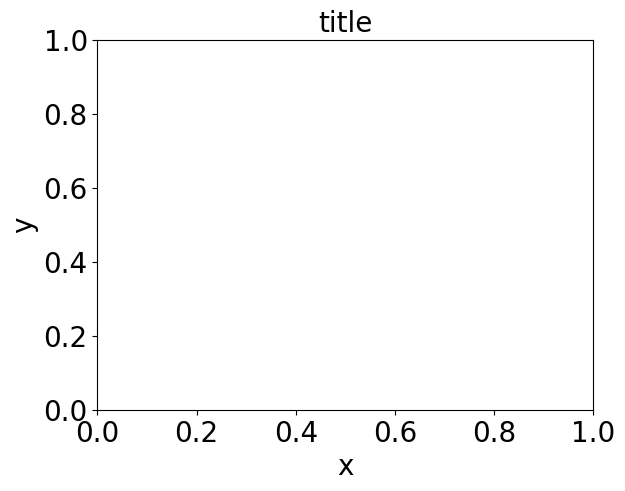

In [14]:
ax = plt.subplot(111, xlabel='x', ylabel='y', title='title')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)

# Sort a boxplot by Median (or Mean)
  * https://stackoverflow.com/questions/21912634/how-can-i-sort-a-boxplot-in-pandas-by-the-median-values

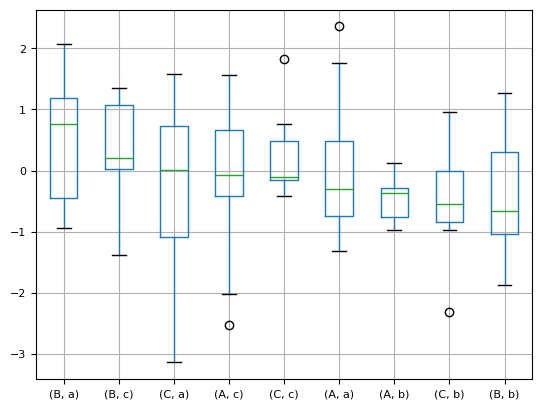

In [15]:
import random
import matplotlib.pyplot as plt

n = 100
# this is probably a strange way to generate random data; please feel free to correct it
df = pd.DataFrame({"X": [random.choice(["A","B","C"]) for i in range(n)], 
                   "Y": [random.choice(["a","b","c"]) for i in range(n)],
                   "Z": [random.gauss(0,1) for i in range(n)]})
grouped = df.groupby(["X", "Y"])

df2 = pd.DataFrame({col:vals['Z'] for col,vals in grouped})

meds = df2.median()
meds.sort_values(ascending=False, inplace=True)
df2 = df2[meds.index]
df2.boxplot()

plt.show()

# Change font size of existing plot
  * https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot

In [16]:
#import matplotlib.pyplot as plt

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# Time delta to hours or days
  * https://stackoverflow.com/questions/22923775/calculate-time-difference-between-two-pandas-columns-in-hours-and-minutes

In [18]:
df = pd.DataFrame(columns=['to','fr','ans'])
df.to = [pd.Timestamp('2014-01-24 13:03:12.050000'), pd.Timestamp('2014-01-27 11:57:18.240000'), pd.Timestamp('2014-01-23 10:07:47.660000')]
df.fr = [pd.Timestamp('2014-01-26 23:41:21.870000'), pd.Timestamp('2014-01-27 15:38:22.540000'), pd.Timestamp('2014-01-23 18:50:41.420000')]
(df.fr-df.to).astype('timedelta64[h]')

0    58.0
1     3.0
2     8.0
dtype: float64

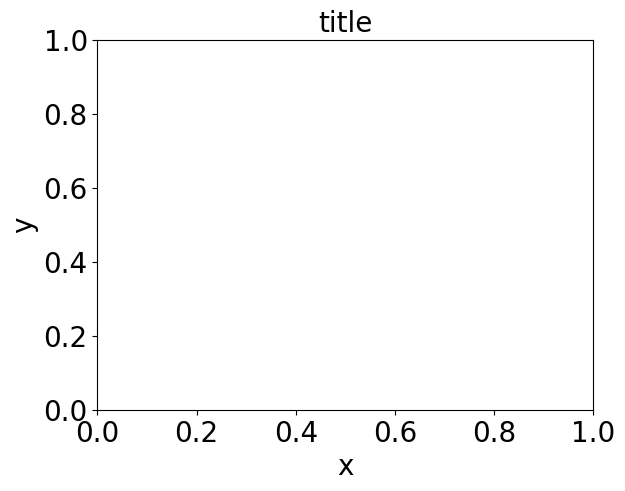

In [19]:
import matplotlib.pyplot as plt

ax = plt.subplot(111, xlabel='x', ylabel='y', title='title')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)

## From:
  * https://stackoverflow.com/questions/64034882/change-order-of-plot-in-stacked-bar-plot-pandas

In [39]:
n= 20
df = pd.DataFrame({"counts": np.random.randint(5, 15, n),
                   "Category": np.random.randint(1, 10, n),
                   "Decade": [random.choice(["80s","90s","00s", "10s"]) for i in range(n)]})
print (len(df.index))
df.head()

20


,counts,Category,Decade
0,7,5,80s
1,13,5,90s
2,10,3,10s
3,11,2,80s
4,7,9,10s


# Notice Wrong Alpha/Chronological order for bar chart

<Axes: xlabel='Decade'>

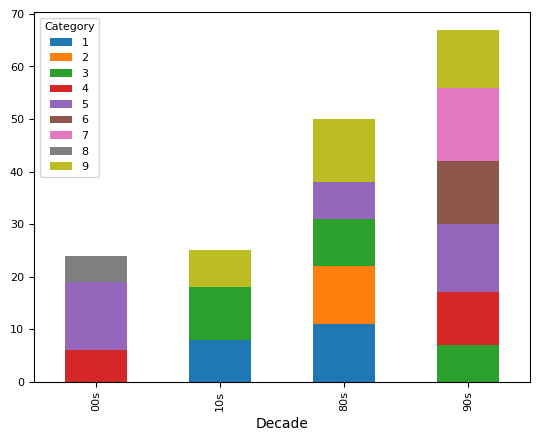

In [41]:
df.pivot_table('counts', 'Decade', 'Category', 'first').plot.bar(stacked=True)

<Axes: xlabel='Decade'>

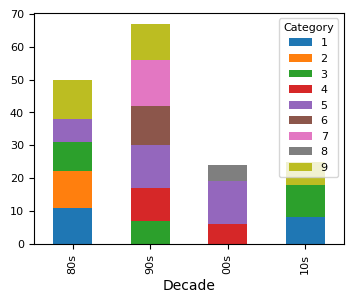

In [44]:
(df.pivot_table('counts', 'Decade', 'Category', 'first')\
.reindex(['80s', '90s', '00s', '10s'])\
.plot.bar(stacked=True, figsize=(4,3)))

In [49]:
import pandas as pd

my_cat = pd.CategoricalDtype(categories=['80s', '90s', '00s', '10s'], ordered=True)
df['Decade'] = df['Decade'].astype(my_cat)

<Axes: ylabel='Decade'>

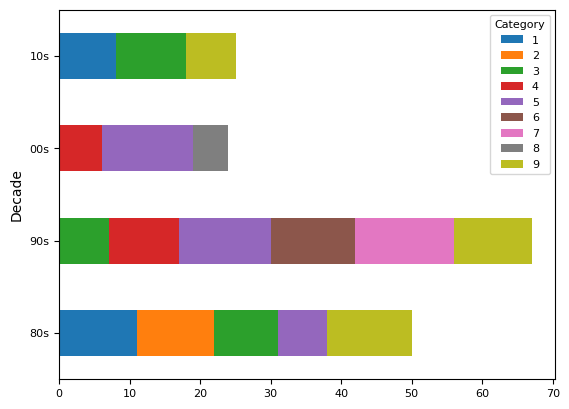

In [50]:
df.pivot_table('counts', 'Decade', 'Category', 'first').plot.barh(stacked=True)

## bars sorted by sum then displayed
  * https://stackoverflow.com/questions/40745875/pandas-stacked-bar-chart-with-sorted-values

In [64]:
import pandas as pd
import numpy as np

arrays = [np.array(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux', 'qux']),
          np.array(['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two', 'three'])]

s = pd.Series([10,20,10,22,10,24,10,26, 11], index=arrays)
s_sort = s.groupby(level=[0]).sum().sort_values(ascending=False)
s_sort

qux    47
foo    34
baz    32
bar    30
dtype: int64

<Axes: >

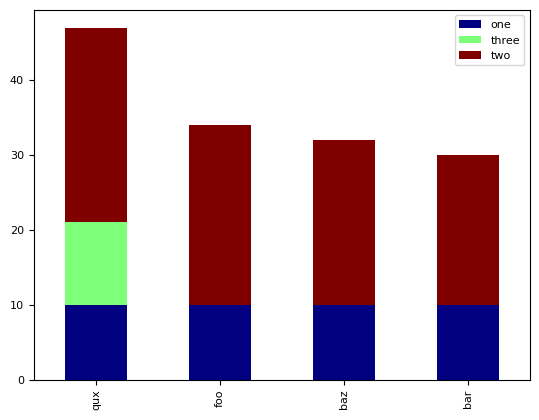

In [65]:
cmp = plt.colormaps['jet']
s.reindex(index=s_sort.index, level=0).unstack().plot.bar(stacked=True, cmap=cmp)

# Order the individual boxes of a STACKED BAR chart - note boxes order 2018, 2019, 2020
  * from : https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/

Text(0, 0.5, 'Pies Consumed')

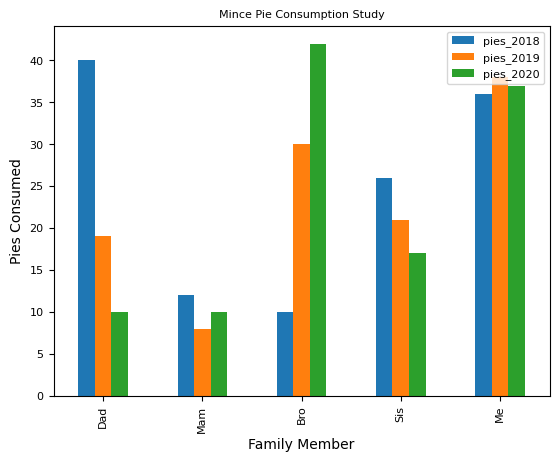

In [77]:
plotdata = pd.DataFrame({
    "pies_2018":[40, 12, 10, 26, 36],
    "pies_2019":[19, 8, 30, 21, 38],
    "pies_2020":[10, 10, 42, 17, 37]
    }, 
    index=["Dad", "Mam", "Bro", "Sis", "Me"]
)
plotdata.plot(kind="bar")
plt.title("Mince Pie Consumption Study")
plt.xlabel("Family Member")
plt.ylabel("Pies Consumed")

In [78]:
plotdata

,pies_2018,pies_2019,pies_2020
Dad,40,19,10
Mam,12,8,10
Bro,10,30,42
Sis,26,21,17
Me,36,38,37


# See Order of boxes - alpha order from 2018, 2019 to 2020

Text(0, 0.5, 'Pies Consumed')

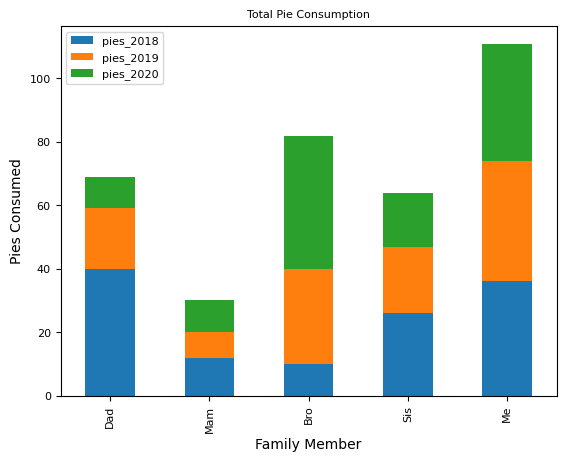

In [70]:
# Adding the stacked=True option to plot() 
# creates a stacked bar plot
plotdata.plot(kind='bar', stacked=True)
plt.title("Total Pie Consumption")
plt.xlabel("Family Member")
plt.ylabel("Pies Consumed")

# CHANGE Order of boxes by re-ordering the input

Text(0, 0.5, 'Pies Consumed')

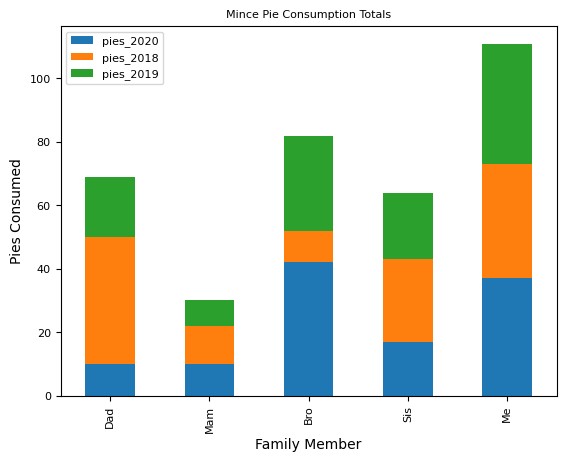

In [72]:
# Choose columns in the order to "stack" them
plotdata[["pies_2020", "pies_2018", "pies_2019"]].plot(kind="bar", stacked=True)
plt.title("Mince Pie Consumption Totals")
plt.xlabel("Family Member")
plt.ylabel("Pies Consumed")

# Reorder a pivot table column from 1,2,3 to 3,1,2

In [113]:
n= 20
df = pd.DataFrame({"counts": np.random.randint(5, 15, n),
                   "Category": np.random.randint(1, 4, n),
                   "Decade": [random.choice(["80s","90s","00s", "10s"]) for i in range(n)]})
print (len(df.index))
df.head()

20


,counts,Category,Decade
0,10,2,10s
1,6,2,90s
2,11,3,80s
3,14,2,00s
4,9,3,10s


In [114]:
#df.pivot(index='Decade', columns='Category', values='counts')

In [115]:
#df['Category'] = pd.Categorical(df['Category'], ["2", "1", "4", "3"])

In [116]:
colList = df.pivot_table('counts', 'Decade', 'Category', 'first').columns.tolist()
colList

[1, 2, 3]

In [117]:
colList = colList[-1:] + colList[:-1]
colList

[3, 1, 2]

In [118]:
pivtab = df.pivot_table('counts', 'Decade', 'Category', 'first')
pivtab = pivtab[colList]

# See 3, 1, 2 order of BOXES (not BARS)

<Axes: ylabel='Decade'>

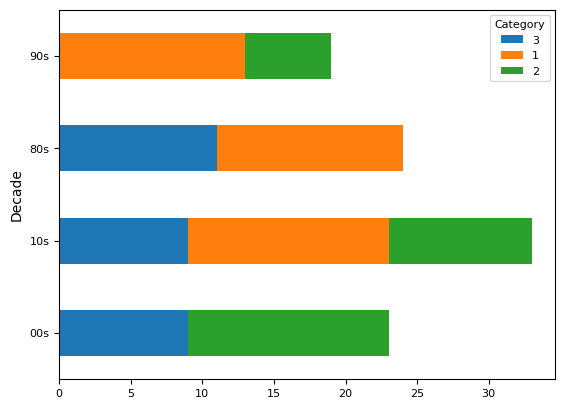

In [121]:
pivtab.plot.barh(stacked=True)

<Axes: ylabel='Decade'>

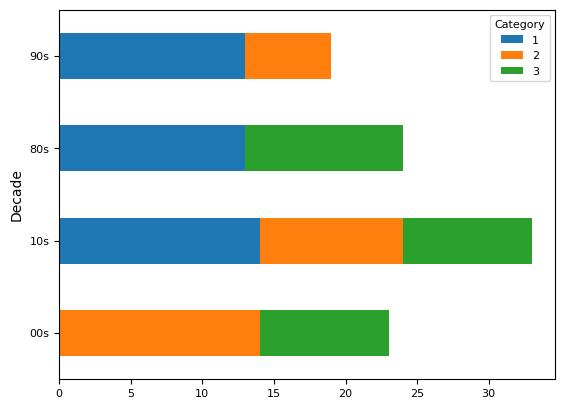

In [122]:
df.pivot_table('counts', 'Decade', 'Category', 'first').plot.barh(stacked=True)

In [91]:
custom_dict = {2: 0, 1: 1, 3: 3} 
df = df.sort_values(by=['Category'], key=lambda x: x.map(custom_dict))
df.head()

,counts,Category,Decade
9,6,2,90s
16,8,2,80s
13,14,2,90s
4,8,2,10s
7,6,2,10s


<Axes: ylabel='Decade'>

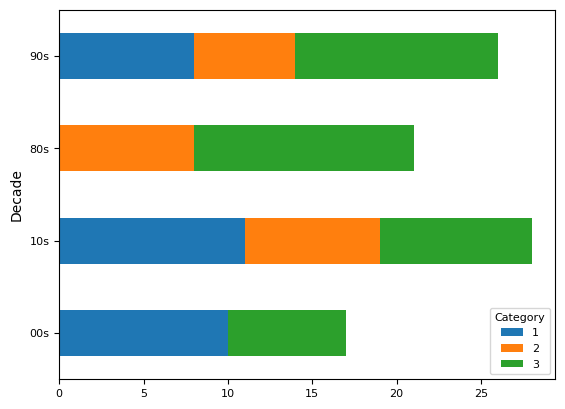

In [93]:
df.sort_values(by=['Category'], key=lambda x: x.map(custom_dict)).pivot_table('counts', 'Decade', 'Category', 'first').plot.barh(stacked=True)

In [88]:
df.head()

,counts,Category,Decade
0,13,3,00s
1,10,1,10s
2,9,3,10s
3,5,1,90s
4,8,2,10s


<Axes: ylabel='Decade'>

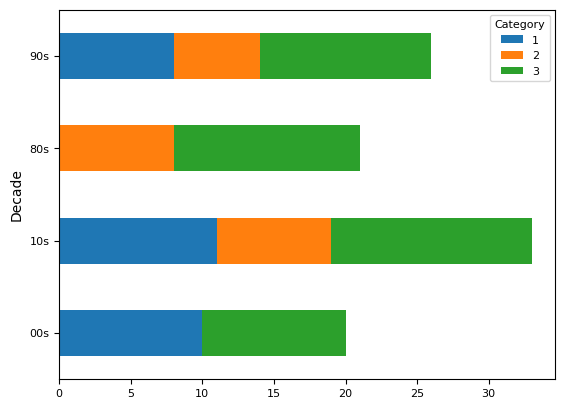

group
a    Axes(0.125,0.11;0.775x0.77)
b    Axes(0.125,0.11;0.775x0.77)
dtype: object

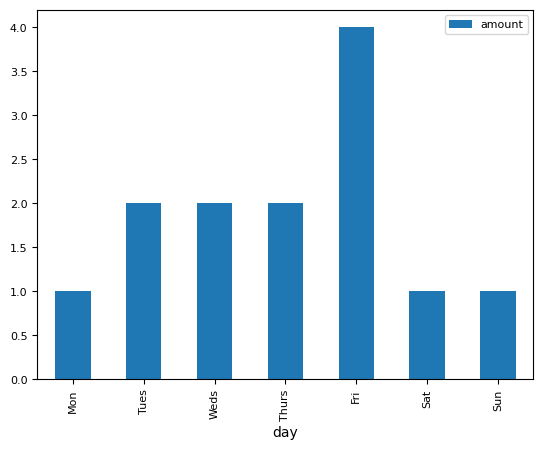

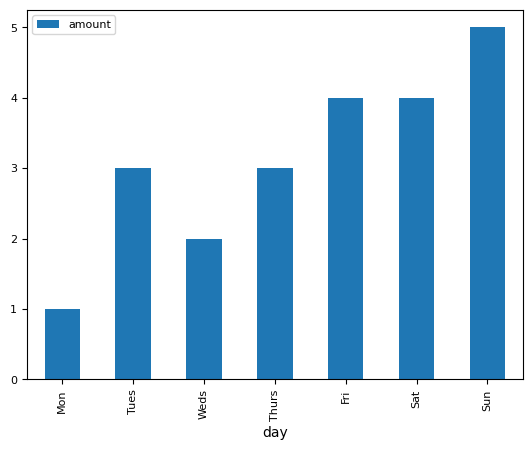

In [67]:
df=pd.DataFrame({'group':['a','a','a','a','a','a','a','b','b','b','b','b','b','b'],
     'day':['Mon','Tues','Fri','Thurs','Sat','Sun','Weds','Fri','Sun','Thurs','Sat','Weds','Mon','Tues'],
     'amount':[1,2,4,2,1,1,2,4,5,3,4,2,1,3]})

order = ['Mon', 'Tues', 'Weds','Thurs','Fri','Sat','Sun']
df.set_index('day').loc[order].groupby('group').plot(kind='bar')

In [59]:
n= 20
df = pd.DataFrame({"counts": np.random.randint(5, 15, n),
                   "Category": np.random.randint(1, 10, n),
                   "Decade": [random.choice(["80s","90s","00s", "10s"]) for i in range(n)]})
print (len(df.index))
df.head()

my_cat = pd.CategoricalDtype(categories=['10s', '00s', '90s', '80s',   ], ordered=True)
df['Decade'] = df['Decade'].astype(my_cat)

categories=['9','7', '5', '3', '1', '8', '6', '4', '2', '0']
#df['Category'] = df['Category'].astype(my_order)

df.columns = pd.CategoricalIndex(df.columns.values, 
                                 ordered=True, 
                                 categories=categories)

# Sort the columns (axis=1) by the new categorical ordering
df = df.sort_index(axis=1)
df.head()
#df.pivot_table('counts', 'Decade', 'Category', 'first').plot.barh(stacked=True)

20


,NaN,NaN,NaN
0,9,2,00s
1,7,8,80s
2,11,5,90s
3,14,8,80s
4,10,8,00s


CategoricalDtype(categories=['10s', '00s', '90s', '80s'], ordered=True)

# Done - ZZZZ